# Importing Packages

In [ ]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tqdm

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Loading

In [ ]:
_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')
print(base_dir)

228827136/228813984 [==============================] - 2s 0us/step
/root/.keras/datasets/flower_photos


In [ ]:
numberOfTestPerClass = 100 
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  images = sorted(images)
  train, val, test = images[:-numberOfTestPerClass*2], images[-numberOfTestPerClass*2:-numberOfTestPerClass], images[-numberOfTestPerClass:]

  for image in tqdm.tqdm(train):
      destination = os.path.join(base_dir+'/train', cl)
      os.makedirs(destination, exist_ok=True)
      shutil.copy(os.path.join(img_path, image), destination)
      
  for image in tqdm.tqdm(val):
      destination = os.path.join(base_dir+'/val', cl)
      os.makedirs(destination, exist_ok=True)
      shutil.copy(os.path.join(img_path, image), destination)

  for image in tqdm.tqdm(test):
      destination = os.path.join(base_dir+'/test', cl)
      os.makedirs(destination, exist_ok=True)
      shutil.copy(os.path.join(img_path, image), destination)
        
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

roses: 641 Images


100%|██████████| 100/100 [00:00<00:00, 2354.56it/s]


daisy: 633 Images


100%|██████████| 100/100 [00:00<00:00, 3404.11it/s]


dandelion: 898 Images


100%|██████████| 100/100 [00:00<00:00, 3431.88it/s]


sunflowers: 699 Images


100%|██████████| 100/100 [00:00<00:00, 2916.40it/s]


tulips: 799 Images


100%|██████████| 100/100 [00:00<00:00, 3483.12it/s]


# Data Preprocessing

In [ ]:
batch_size = 100
IMG_SHAPE = 150 

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,rotation_range=45,
                    width_shift_range=.15,height_shift_range=.15,
                    horizontal_flip=True,zoom_range=0.5)

image_gen_val = ImageDataGenerator(rescale=1./255)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size, directory=train_dir, 
                                                     shuffle=True,target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')


val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

test_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=test_dir,
                                                 shuffle=False,target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 2670 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


# CNN Creation

In [ ]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

# Training

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/80
27/27 [==============================] - 34s 802ms/step - loss: 1.4725 - accuracy: 0.3730 - val_loss: 1.2852 - val_accuracy: 0.3960
Epoch 2/80
27/27 [==============================] - 22s 795ms/step - loss: 1.1725 - accuracy: 0.4989 - val_loss: 1.1222 - val_accuracy: 0.5220
Epoch 3/80
27/27 [==============================] - 22s 800ms/step - loss: 1.0729 - accuracy: 0.5610 - val_loss: 0.9885 - val_accuracy: 0.6220
Epoch 4/80
27/27 [==============================] - 21s 785ms/step - loss: 1.0015 - accuracy: 0.6127 - val_loss: 1.0447 - val_accuracy: 0.5740
Epoch 5/80
27/27 [==============================] - 22s 802ms/step - loss: 0.9469 - accuracy: 0.6225 - val_loss: 0.9417 - val_accuracy: 0.6360
Epoch 6/80
27/27 [==============================] - 22s 830ms/step - loss: 0.8902 - accuracy: 0.6569 - val_loss: 0.9415 - val_accuracy: 0.6200
Epoch 7/80
27/27 [==============================] - 22s 825ms/step - loss: 0.8565 - accuracy: 0.6592 - val_loss: 0.9046 - val_accuracy: 0.6740

# Prediction & Results

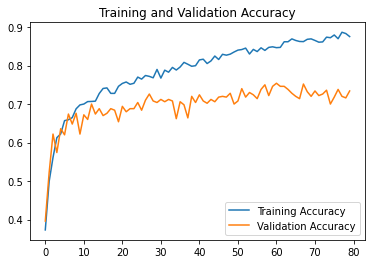

In [ ]:
plt.figure()
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

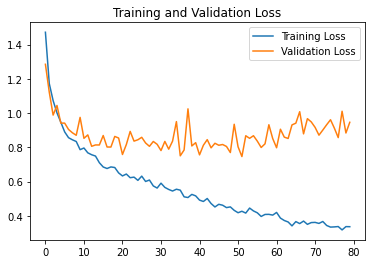

In [ ]:
plt.figure()
plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
for i,name in enumerate(classes):
  print('CCR',name.upper(),': ', (np.argmax(model.predict(test_data_gen[i][0]), axis=1) == test_data_gen[i][1]).mean())

ACCR = model.evaluate(test_data_gen,verbose=3)[1]
print('ACCR: ',ACCR)

CCR ROSES :  0.87
CCR DAISY :  0.9
CCR DANDELION :  0.85
CCR SUNFLOWERS :  0.88
CCR TULIPS :  0.88
ACCR:  0.8891385793685913
